# Finding the best District for Italian restaraunt in Saint-Petersburg

## In this project we will use diffrent data, methods to clean it and form, also we will use several libraries of Python

In [4]:
%config Completer.use_jedi=False

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import json
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import math

Now we will pase coordinates of the city and transform it to DataFrame

In [6]:
source = requests.get('https://www.gps-latitude-longitude.com/gps-coordinates-of-st-petersburg-russia').text
soup = BeautifulSoup(source, 'html5lib')

In [7]:
type(soup)

bs4.BeautifulSoup

In [10]:
table = soup.find('table')

for row in table.findAll('td'):
    print(row.text)

Latitude of st petersburg russia
59.934280
Longitude of st petersburg russia
30.335099


In [11]:
table = soup.find('table')
table_contents = []
for row in table.findAll('td'):
    cell = {row.text}
#     cell[] = row.text
    table_contents.append(cell)
df = pd.DataFrame(table_contents)
df

,0
0,Latitude of st petersburg russia
1,59.934280
2,Longitude of st petersburg russia
3,30.335099


Now we add latitude and longitude to new DataFrame

In [12]:
SPb_coor = {'Place': 'Saint-Petersburg', 'Latitude': df.loc[1], 'Longitude': df.loc[3]}
df_SPb = pd.DataFrame(SPb_coor)
df_SPb

,Place,Latitude,Longitude
0,Saint-Petersburg,59.934280,30.335099


Here is another method, how to find coordinates we want, using geopy service (coordinates are bit diffrent, the reason is that the site we parsed uses coordinates of Sadovaya Street in Saint Petersburg, while Geopy uses coordinates of Dvortsovaya Ploshad)

In [13]:
city = 'Russia, Saint-Petersburg'

geolocator = Nominatim(user_agent="spb_explorer")
location = geolocator.geocode(city)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Saint-Petersburg City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Saint-Petersburg City are 59.938732, 30.316229.


In [61]:
SPb_data = pd.read_excel('SPb_data.xlsx')
SPb_data = pd.DataFrame(SPb_data)
SPb_data

,District,Population,Square area,Longitude,Latitude
0,Admiraltejskij,156958,"13,82",59.91683,30.30000
1,Central'nyj,210899,"17,77",59.93860,30.35000
2,Frunzenskij,384385,"37,52",59.84870,30.40000
3,Kalininskij,521875,"40,18",59.99860,30.40000
4,Kirovskij,331550,"47,46",59.86860,30.25000
5,Kolpinskij,194934,"102,25",59.78920,30.59970
6,Krasnogvardejskij,355621,"56,35",59.97200,30.48500
7,Krasnosel'skij,412886,"90,49",59.77180,30.00230
8,Kronštadtskij,44353,"19,53",59.99450,29.76680
9,Kurortnyj,78910,"268,19",60.15930,29.90000


#### Now we will create the map of the city with ditricts in it

In [62]:

map_SPb = folium.Map(location=[latitude, longitude], zoom_start=10)


for lat, lng, district in zip(SPb_data['Latitude'], SPb_data['Longitude'], SPb_data['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SPb)  
    
map_SPb

#### Smth went wrong, so we need to reverse latitude and longitude

In [66]:
SPb_data.rename(columns = {'Longitude': 'Latitude', 'Latitude': 'Longitude'}, inplace = True)

In [67]:
SPb_data

,District,Population,Square area,Latitude,Longitude
0,Admiraltejskij,156958,"13,82",59.91683,30.30000
1,Central'nyj,210899,"17,77",59.93860,30.35000
2,Frunzenskij,384385,"37,52",59.84870,30.40000
3,Kalininskij,521875,"40,18",59.99860,30.40000
4,Kirovskij,331550,"47,46",59.86860,30.25000
5,Kolpinskij,194934,"102,25",59.78920,30.59970
6,Krasnogvardejskij,355621,"56,35",59.97200,30.48500
7,Krasnosel'skij,412886,"90,49",59.77180,30.00230
8,Kronštadtskij,44353,"19,53",59.99450,29.76680
9,Kurortnyj,78910,"268,19",60.15930,29.90000


#### now let's make every column numeric, so we could use data in it

In [68]:
SPb_data['Square area'] = SPb_data['Square area'].str.replace(',', '.')

In [69]:
SPb_data['Square area'] = pd.to_numeric(SPb_data['Square area'])
SPb_data['Longitude'] = pd.to_numeric(SPb_data['Longitude'])
SPb_data['Latitude'] = pd.to_numeric(SPb_data['Latitude'])

In [70]:
SPb_data['Square area'].dtypes

dtype('float64')

In [71]:
SPb_data['Longitude'].dtypes

dtype('float64')

In [72]:
SPb_data['Latitude'].dtypes

dtype('float64')

#### Let's calculate the population density and add column

In [73]:
SPb_data['Population density'] = SPb_data['Population'] / SPb_data['Square area']
SPb_data.sort_values(by=['Population density'], ascending=False)

,District,Population,Square area,Latitude,Longitude,Population density
3,Kalininskij,521875,40.18,59.99860,30.40000,12988.427078
1,Central'nyj,210899,17.77,59.93860,30.35000,11868.261114
0,Admiraltejskij,156958,13.82,59.91683,30.30000,11357.308249
2,Frunzenskij,384385,37.52,59.84870,30.40000,10244.802772
16,Vasileostrovskij,205240,21.47,59.93283,30.25000,9559.385189
11,Nevskij,538323,60.66,59.88930,30.46030,8874.431256
4,Kirovskij,331550,47.46,59.86860,30.25000,6985.882849
13,Petrogradskij,125731,19.54,59.95910,30.27970,6434.544524
6,Krasnogvardejskij,355621,56.35,59.97200,30.48500,6310.931677
14,Primorskij,580100,109.90,59.99860,30.20000,5278.434941


In [24]:
print('The dataframe has {} districts.'.format(
        len(SPb_data['District'].unique()),
        SPb_data.shape[0]
    )
)

The dataframe has 18 districts.


#### Map with right districts in it

In [74]:
# create map of New York using latitude and longitude values
map_SPb = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, district, square_area in zip(SPb_data['Latitude'], SPb_data['Longitude'], SPb_data['District'], SPb_data['Square area']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=square_area * 30,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SPb)  
    
map_SPb

In [26]:
CLIENT_ID = 'FZOLLS2DOAQYLXXQ0EWQCKAN5LOL3G4JXH2UYMB5YSABSJGI' # your Foursquare ID
CLIENT_SECRET = '4VRYFUPAVXNURPBBQY13G2AIO0VR2MNLMFFIR2GW2GAFSFA0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

VERSION = 20202808
radius = 2000
LIMIT = 500

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: FZOLLS2DOAQYLXXQ0EWQCKAN5LOL3G4JXH2UYMB5YSABSJGI
CLIENT_SECRET:4VRYFUPAVXNURPBBQY13G2AIO0VR2MNLMFFIR2GW2GAFSFA0


In [27]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
# Part 1: creating the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
# Part 2: making the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']    
        
# Part 3 returning only relevant information for each nearby venue and append to the list 
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    return (venues_list)

In [28]:
SPb_venues = getNearbyVenues(names = SPb_data['District'],
                              latitudes = SPb_data['Latitude'],
                            longitudes = SPb_data['Longitude'])

Admiraltejskij 
Central'nyj 
Frunzenskij 
Kalininskij 
Kirovskij 
Kolpinskij 
Krasnogvardejskij 
Krasnosel'skij 
Kronštadtskij 
Kurortnyj 
Moskovskij 
Nevskij 
Petrodvorcovyj 
Petrogradskij 
Primorskij 
Puškinskij 
Vasileostrovskij 
Vyborgskij 


In [57]:
SPb_venues.head(10)

,District,District_Latitude,District Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Admiraltejskij,59.91683,30.3,Усачевские бани. Купеческий класс,59.918335,30.299474,Historic Site
1,Admiraltejskij,59.91683,30.3,Alexander House,59.919205,30.300146,Hotel
2,Admiraltejskij,59.91683,30.3,The Seven Bridges Point (Семимостье),59.920811,30.298543,Historic Site
3,Admiraltejskij,59.91683,30.3,Палантин,59.913655,30.296419,Hotel
4,Admiraltejskij,59.91683,30.3,Kryukov Canal (Крюков канал),59.920978,30.299178,Canal
5,Admiraltejskij,59.91683,30.3,Детский театр «На Неве»,59.914004,30.309851,Theater
6,Admiraltejskij,59.91683,30.3,Измайловский сад,59.919530,30.312857,Park
7,Admiraltejskij,59.91683,30.3,Багратиони / Bagrationi,59.921898,30.304596,Middle Eastern Restaurant
8,Admiraltejskij,59.91683,30.3,Никольский Сад,59.922979,30.299306,Park
9,Admiraltejskij,59.91683,30.3,Время Spa,59.923869,30.292529,Spa


In [30]:
SPb_venues = pd.DataFrame([item for venue_list in SPb_venues for item in venue_list])


In [58]:
SPb_venues.head(10)

,District,District_Latitude,District Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Admiraltejskij,59.91683,30.3,Усачевские бани. Купеческий класс,59.918335,30.299474,Historic Site
1,Admiraltejskij,59.91683,30.3,Alexander House,59.919205,30.300146,Hotel
2,Admiraltejskij,59.91683,30.3,The Seven Bridges Point (Семимостье),59.920811,30.298543,Historic Site
3,Admiraltejskij,59.91683,30.3,Палантин,59.913655,30.296419,Hotel
4,Admiraltejskij,59.91683,30.3,Kryukov Canal (Крюков канал),59.920978,30.299178,Canal
5,Admiraltejskij,59.91683,30.3,Детский театр «На Неве»,59.914004,30.309851,Theater
6,Admiraltejskij,59.91683,30.3,Измайловский сад,59.919530,30.312857,Park
7,Admiraltejskij,59.91683,30.3,Багратиони / Bagrationi,59.921898,30.304596,Middle Eastern Restaurant
8,Admiraltejskij,59.91683,30.3,Никольский Сад,59.922979,30.299306,Park
9,Admiraltejskij,59.91683,30.3,Время Spa,59.923869,30.292529,Spa


In [32]:
SPb_venues.columns = ['District', 
                  'District_Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']

In [33]:
SPb_venues = pd.DataFrame(SPb_venues)
SPb_venues

,District,District_Latitude,District Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Admiraltejskij,59.91683,30.30000,Усачевские бани. Купеческий класс,59.918335,30.299474,Historic Site
1,Admiraltejskij,59.91683,30.30000,Alexander House,59.919205,30.300146,Hotel
2,Admiraltejskij,59.91683,30.30000,The Seven Bridges Point (Семимостье),59.920811,30.298543,Historic Site
3,Admiraltejskij,59.91683,30.30000,Палантин,59.913655,30.296419,Hotel
4,Admiraltejskij,59.91683,30.30000,Kryukov Canal (Крюков канал),59.920978,30.299178,Canal
...,...,...,...,...,...,...,...
1340,Vyborgskij,59.99983,30.33301,Pandora,60.004540,30.299314,Jewelry Store
1341,Vyborgskij,59.99983,30.33301,Буквоед,60.002338,30.299127,Bookstore
1342,Vyborgskij,59.99983,30.33301,Black Cat Pub,60.013036,30.313266,English Restaurant
1343,Vyborgskij,59.99983,30.33301,Автосервис для Land Rover,60.000118,30.324379,Auto Workshop


In [34]:
Admiraltejskij = SPb_venues.loc[SPb_venues['District'] == 'Admiraltejskij']
Admiraltejskij

,District,District_Latitude,District Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category


#### our names of ditricts are in the wrong format, so we will improve it

In [36]:
SPb_venues['District'] = SPb_venues['District'].astype(str).str.replace(u'\xa0', '')

In [48]:
Admiraltejskij = SPb_venues.loc[SPb_venues['District'] == 'Admiraltejskij']
Admiraltejskij

,District,District_Latitude,District Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Admiraltejskij,59.91683,30.3,Усачевские бани. Купеческий класс,59.918335,30.299474,Historic Site
1,Admiraltejskij,59.91683,30.3,Alexander House,59.919205,30.300146,Hotel
2,Admiraltejskij,59.91683,30.3,The Seven Bridges Point (Семимостье),59.920811,30.298543,Historic Site
3,Admiraltejskij,59.91683,30.3,Палантин,59.913655,30.296419,Hotel
4,Admiraltejskij,59.91683,30.3,Kryukov Canal (Крюков канал),59.920978,30.299178,Canal
...,...,...,...,...,...,...,...
95,Admiraltejskij,59.91683,30.3,WöD,59.932163,30.305139,Café
96,Admiraltejskij,59.91683,30.3,Lotte Hotel,59.931383,30.310401,Hotel
97,Admiraltejskij,59.91683,30.3,Додо Пицца,59.920642,30.317957,Pizza Place
98,Admiraltejskij,59.91683,30.3,Северянин,59.926393,30.312993,Russian Restaurant


#### now we wil get the number of Italian Restaurants in each district within radius of 2km

In [39]:
Italian = SPb_venues.loc[SPb_venues.Venue_Category == 'Italian Restaurant']
Italian = Italian.drop(columns=['District_Latitude', 'District Longitude', 'Venue', 'Venue_Latitude', 'Venue_Longitude'])
Italian_1 = Italian.groupby(Italian['District']).count()
Italian_1.columns = ['Number_of_IT_Restar']
Italian_1 = pd.DataFrame(Italian_1).reset_index()
Italian_1

,District,Number_of_IT_Restar
0,Admiraltejskij,4
1,Central'nyj,3
2,Frunzenskij,2
3,Kalininskij,1
4,Kirovskij,3
5,Petrogradskij,3
6,Vasileostrovskij,1
7,Vyborgskij,1


#### merging two tables

In [42]:
SPb_data['District'] = SPb_data['District'].astype(str).str.replace(u'\xa0', '')

In [43]:
SPb_IT = SPb_data.merge(Italian_1, how='left', left_on='District', right_on='District')
SPb_IT

,District,Population,Square area,Latitude,Longitude,Population density,Number_of_IT_Restar
0,Admiraltejskij,156958,13.82,59.91683,30.30000,11357.308249,4.0
1,Central'nyj,210899,17.77,59.93860,30.35000,11868.261114,3.0
2,Frunzenskij,384385,37.52,59.84870,30.40000,10244.802772,2.0
3,Kalininskij,521875,40.18,59.99860,30.40000,12988.427078,1.0
4,Kirovskij,331550,47.46,59.86860,30.25000,6985.882849,3.0
5,Kolpinskij,194934,102.25,59.78920,30.59970,1906.444988,NaN
6,Krasnogvardejskij,355621,56.35,59.97200,30.48500,6310.931677,NaN
7,Krasnosel'skij,412886,90.49,59.77180,30.00230,4562.780418,NaN
8,Kronštadtskij,44353,19.53,59.99450,29.76680,2271.018945,NaN
9,Kurortnyj,78910,268.19,60.15930,29.90000,294.231701,NaN


In [55]:
SP = SPb_IT.drop(columns=['Latitude', 'Longitude'])
SP.sort_values(by=['Pop_density_per_IT_Restr'], ascending=False)

,District,Population,Square area,Population density,Number_of_IT_Restar,Pop_density_per_IT_Restr
3,Kalininskij,521875,40.18,12988.427078,1.0,25976.854156
16,Vasileostrovskij,205240,21.47,9559.385189,1.0,19118.770377
2,Frunzenskij,384385,37.52,10244.802772,2.0,10244.802772
17,Vyborgskij,523497,115.52,4531.656856,1.0,9063.313712
1,Central'nyj,210899,17.77,11868.261114,3.0,7912.174076
0,Admiraltejskij,156958,13.82,11357.308249,4.0,5678.654124
4,Kirovskij,331550,47.46,6985.882849,3.0,4657.255232
13,Petrogradskij,125731,19.54,6434.544524,3.0,4289.696349
5,Kolpinskij,194934,102.25,1906.444988,NaN,NaN
6,Krasnogvardejskij,355621,56.35,6310.931677,NaN,NaN


#### calculating density per restaraunt

In [44]:
SPb_IT['Pop_density_per_IT_Restr'] = SPb_IT['Population density'] * 2 / SPb_IT['Number_of_IT_Restar']
SPb_IT.sort_values(by=['Pop_density_per_IT_Restr'], ascending=False)

,District,Population,Square area,Latitude,Longitude,Population density,Number_of_IT_Restar,Pop_density_per_IT_Restr
3,Kalininskij,521875,40.18,59.99860,30.40000,12988.427078,1.0,25976.854156
16,Vasileostrovskij,205240,21.47,59.93283,30.25000,9559.385189,1.0,19118.770377
2,Frunzenskij,384385,37.52,59.84870,30.40000,10244.802772,2.0,10244.802772
17,Vyborgskij,523497,115.52,59.99983,30.33301,4531.656856,1.0,9063.313712
1,Central'nyj,210899,17.77,59.93860,30.35000,11868.261114,3.0,7912.174076
0,Admiraltejskij,156958,13.82,59.91683,30.30000,11357.308249,4.0,5678.654124
4,Kirovskij,331550,47.46,59.86860,30.25000,6985.882849,3.0,4657.255232
13,Petrogradskij,125731,19.54,59.95910,30.27970,6434.544524,3.0,4289.696349
5,Kolpinskij,194934,102.25,59.78920,30.59970,1906.444988,NaN,NaN
6,Krasnogvardejskij,355621,56.35,59.97200,30.48500,6310.931677,NaN,NaN


#### Now let's check if the population of the district will rise, because if it will decline maybe we should try another district

In [45]:
df = pd.read_excel('Kalininskij_Population.xlsx')
df

,Year,Population
0,2012,512121
1,2013,516312
2,2014,522493
3,2015,526876
4,2016,530163
5,2017,535428
6,2018,538258
7,2019,537280
8,2020,539600
9,2021,541200


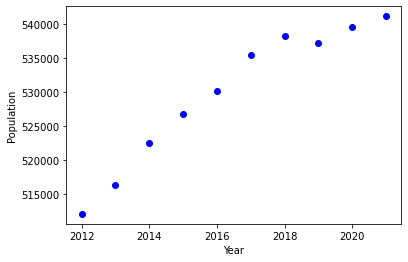

In [46]:
plt.scatter(df.Year, df.Population,  color='blue')
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

#### building regression model

Coefficients: 
 [[3202.02777778]]
Mean squared error: 6347101.35
Coefficient of determination: 0.94


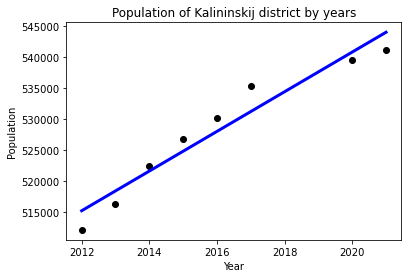

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

train_x = np.asanyarray(train[['Year']])
train_y = np.asanyarray(train[['Population']])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the testing set
population_y_pred = regr.predict(train_x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(train_y, population_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(train_y, population_y_pred))

# Plot outputs
plt.scatter(train_x, train_y,  color='black')
plt.plot(train_x, population_y_pred, color='blue', linewidth=3)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title('Population of Kalininskij district by years')

plt.show()